In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
with open('Ames_Housing_Feature_Description.txt','r') as f: 
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [4]:
df = pd.read_csv('train_house.csv')

In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
df = df.drop(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType','OverallCond',
       'HouseStyle', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'SaleType', 'YrSold',
       'SaleCondition'], axis = 1)

In [9]:
df.head()

,LotArea,OverallQual,TotRmsAbvGrd,MoSold,SalePrice
0,8450,7,8,2,208500
1,9600,6,6,5,181500
2,11250,7,6,9,223500
3,9550,7,7,2,140000
4,14260,8,9,12,250000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   LotArea       1460 non-null   int64
 1   OverallQual   1460 non-null   int64
 2   TotRmsAbvGrd  1460 non-null   int64
 3   MoSold        1460 non-null   int64
 4   SalePrice     1460 non-null   int64
dtypes: int64(5)
memory usage: 57.2 KB


In [11]:
df.isnull()

,LotArea,OverallQual,TotRmsAbvGrd,MoSold,SalePrice
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
1455,False,False,False,False,False
1456,False,False,False,False,False
1457,False,False,False,False,False
1458,False,False,False,False,False


In [12]:
df.isnull().sum()

LotArea         0
OverallQual     0
TotRmsAbvGrd    0
MoSold          0
SalePrice       0
dtype: int64

<AxesSubplot:>

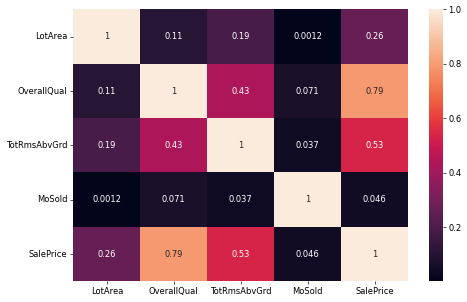

In [13]:
plt.figure(figsize = (9,6), dpi = 60)
sns.heatmap(data = df.corr(), annot = True)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

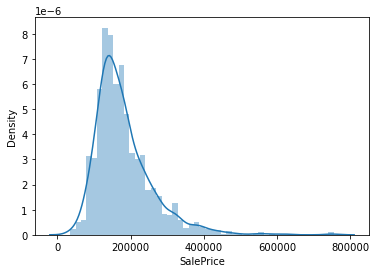

In [14]:
sns.distplot(df['SalePrice'])

In [15]:
df.describe()

,LotArea,OverallQual,TotRmsAbvGrd,MoSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,6.099315,6.517808,6.321918,180921.195890
std,9981.264932,1.382997,1.625393,2.703626,79442.502883
min,1300.000000,1.000000,2.000000,1.000000,34900.000000
25%,7553.500000,5.000000,5.000000,5.000000,129975.000000
50%,9478.500000,6.000000,6.000000,6.000000,163000.000000
75%,11601.500000,7.000000,7.000000,8.000000,214000.000000
max,215245.000000,10.000000,14.000000,12.000000,755000.000000


<AxesSubplot:xlabel='SalePrice'>

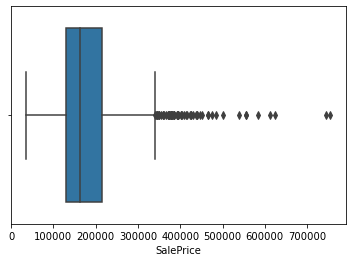

In [16]:
sns.boxplot( x = df['SalePrice'])

<AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='SalePrice'>

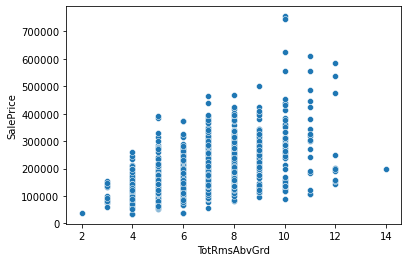

In [17]:
sns.scatterplot( x = df['TotRmsAbvGrd'], y = df['SalePrice'])

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

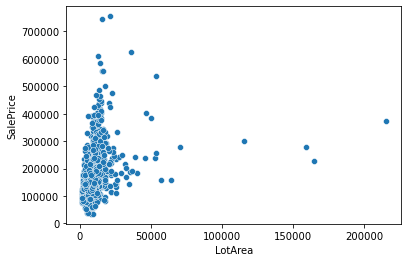

In [18]:
sns.scatterplot( x = df['LotArea'], y = df['SalePrice'])

In [19]:
df[((df['TotRmsAbvGrd']) < 11) & ((df['SalePrice'] >600000))]

,LotArea,OverallQual,TotRmsAbvGrd,MoSold,SalePrice
691,21535,10,10,1,755000
1169,35760,10,10,7,625000
1182,15623,10,10,7,745000


In [20]:
df = df.drop([1182], axis = 0)

In [21]:
df[((df['TotRmsAbvGrd']) < 11) & ((df['SalePrice'] >600000))]

,LotArea,OverallQual,TotRmsAbvGrd,MoSold,SalePrice
691,21535,10,10,1,755000
1169,35760,10,10,7,625000


In [22]:
df[((df['SalePrice']<300000) & (df['TotRmsAbvGrd'] >12))]

,LotArea,OverallQual,TotRmsAbvGrd,MoSold,SalePrice
635,10896,6,14,3,200000


In [23]:
df = df.drop([635], axis = 0)

<AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='SalePrice'>

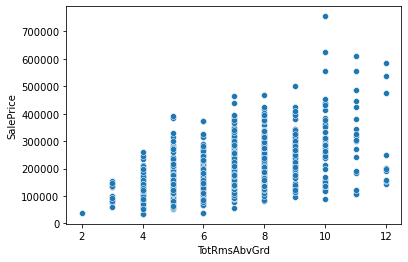

In [24]:
sns.scatterplot( x = df['TotRmsAbvGrd'], y = df['SalePrice'])

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

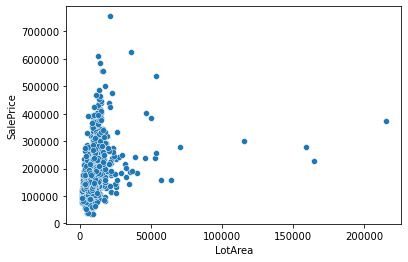

In [25]:
sns.scatterplot( x = df['LotArea'], y = df['SalePrice'])

In [26]:
df[((df['LotArea'] > 150000) & (df['SalePrice'] < 300000))]

,LotArea,OverallQual,TotRmsAbvGrd,MoSold,SalePrice
249,159000,6,7,6,277000
335,164660,5,7,8,228950


In [27]:
df = df.drop([335], axis = 0)

In [28]:
df[((df['LotArea'] < 50000) & (df['SalePrice']> 610000))]

,LotArea,OverallQual,TotRmsAbvGrd,MoSold,SalePrice
691,21535,10,10,1,755000
898,12919,9,11,3,611657
1169,35760,10,10,7,625000


In [29]:
df = df.drop([691], axis = 0)

<AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='SalePrice'>

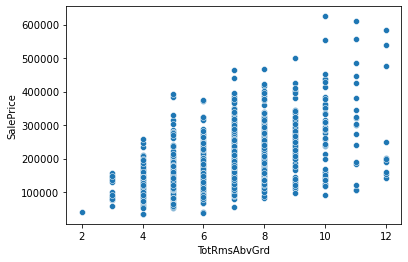

In [30]:
sns.scatterplot( x = df['TotRmsAbvGrd'], y = df['SalePrice'])

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

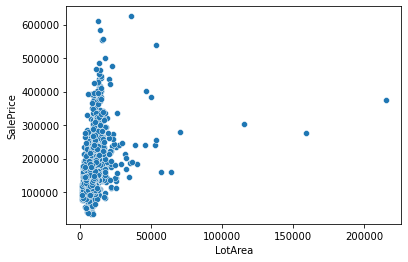

In [31]:
sns.scatterplot( x = df['LotArea'], y = df['SalePrice'])

In [32]:
df[((df['LotArea'] > 100000) & (df['SalePrice'] < 400000))]

,LotArea,OverallQual,TotRmsAbvGrd,MoSold,SalePrice
249,159000,6,7,6,277000
313,215245,7,8,6,375000
706,115149,7,5,6,302000


In [33]:
df = df.drop([313], axis = 0)

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

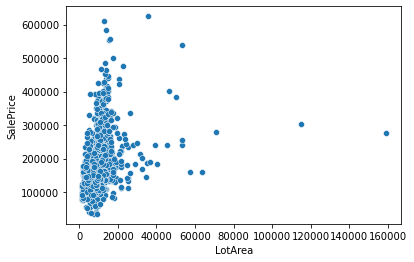

In [34]:
sns.scatterplot( x = df['LotArea'], y = df['SalePrice'])

In [35]:
df = df.drop([249], axis = 0)

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

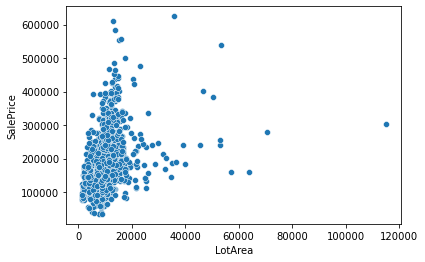

In [36]:
sns.scatterplot( x = df['LotArea'], y = df['SalePrice'])

In [37]:
df[((df['SalePrice'] >600000) & (df['TotRmsAbvGrd']<12))]

,LotArea,OverallQual,TotRmsAbvGrd,MoSold,SalePrice
898,12919,9,11,3,611657
1169,35760,10,10,7,625000


In [38]:
df = df.drop([898], axis = 0)

<AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='SalePrice'>

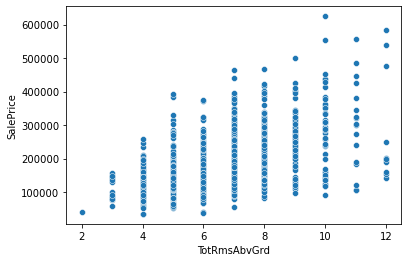

In [39]:
sns.scatterplot( x = df['TotRmsAbvGrd'], y = df['SalePrice'])

In [40]:
df.head()

,LotArea,OverallQual,TotRmsAbvGrd,MoSold,SalePrice
0,8450,7,8,2,208500
1,9600,6,6,5,181500
2,11250,7,6,9,223500
3,9550,7,7,2,140000
4,14260,8,9,12,250000


In [41]:
df.describe()

,LotArea,OverallQual,TotRmsAbvGrd,MoSold,SalePrice
count,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000
mean,10154.639367,6.092223,6.503097,6.328975,179595.553338
std,6281.331158,1.376115,1.607326,2.703272,75708.338913
min,1300.000000,1.000000,2.000000,1.000000,34900.000000
25%,7535.000000,5.000000,5.000000,5.000000,129900.000000
50%,9453.000000,6.000000,6.000000,6.000000,162900.000000
75%,11553.000000,7.000000,7.000000,8.000000,213490.000000
max,115149.000000,10.000000,12.000000,12.000000,625000.000000


<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

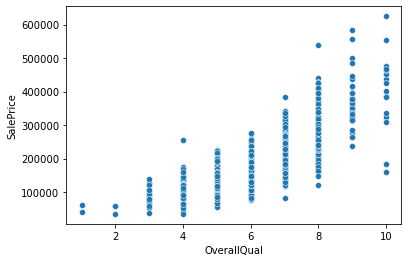

In [42]:
sns.scatterplot(x = df['OverallQual'], y = df['SalePrice'])

In [43]:
df[((df['OverallQual']> 8) & (df['SalePrice'] < 200000))]

,LotArea,OverallQual,TotRmsAbvGrd,MoSold,SalePrice
523,40094,10,11,10,184750
1298,63887,10,12,1,160000


In [44]:
df = df.drop([1298], axis = 0)

In [45]:
df[((df['OverallQual'] <9) & (df['SalePrice']>500000))]

,LotArea,OverallQual,TotRmsAbvGrd,MoSold,SalePrice
769,53504,8,12,6,538000


In [46]:
df = df.drop([523], axis = 0)

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

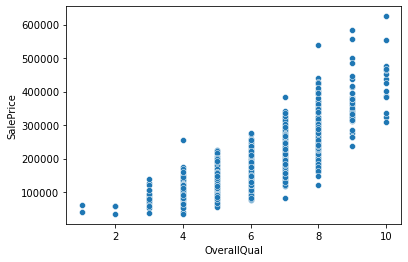

In [47]:
sns.scatterplot(x = df['OverallQual'], y = df['SalePrice'])


<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

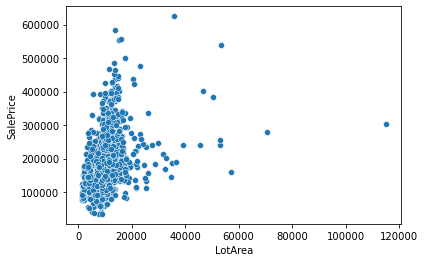

In [48]:
sns.scatterplot( x = df['LotArea'], y = df['SalePrice'])

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

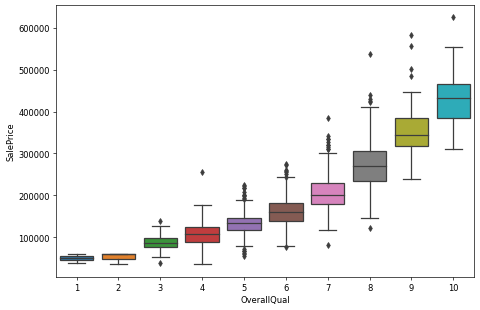

In [49]:
plt.figure(figsize= (9,6), dpi = 60)

sns.boxplot( y = df['SalePrice'], x = df['OverallQual'])

In [50]:
df = df.drop([393], axis = 0)

In [51]:
df.isnull().sum()

LotArea         0
OverallQual     0
TotRmsAbvGrd    0
MoSold          0
SalePrice       0
dtype: int64

In [52]:
df.head()

,LotArea,OverallQual,TotRmsAbvGrd,MoSold,SalePrice
0,8450,7,8,2,208500
1,9600,6,6,5,181500
2,11250,7,6,9,223500
3,9550,7,7,2,140000
4,14260,8,9,12,250000


In [53]:
df.describe()

,LotArea,OverallQual,TotRmsAbvGrd,MoSold,SalePrice
count,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000
mean,10098.802759,6.088276,6.497931,6.331724,179660.406207
std,6075.976665,1.368758,1.596773,2.700029,75755.922052
min,1300.000000,1.000000,2.000000,1.000000,34900.000000
25%,7536.250000,5.000000,5.000000,5.000000,129900.000000
50%,9452.500000,6.000000,6.000000,6.000000,162900.000000
75%,11522.500000,7.000000,7.000000,8.000000,213497.500000
max,115149.000000,10.000000,12.000000,12.000000,625000.000000


In [54]:
h = np.log(df['SalePrice'])
k = np.log(df['LotArea'])

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

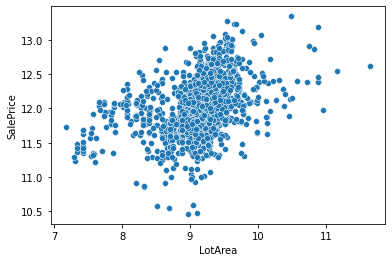

In [55]:

sns.scatterplot(y = h, x = k)

In [56]:
df['SalePrice'] = h

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

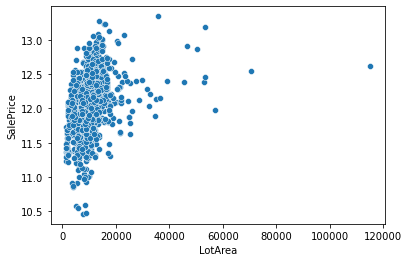

In [57]:
sns.scatterplot( x = df['LotArea'], y = df['SalePrice'])

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

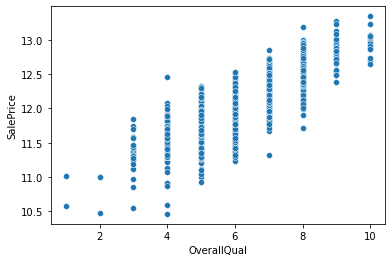

In [58]:
sns.scatterplot(x = df['OverallQual'], y = df['SalePrice'])

## Model Building 

In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
X = df.drop(['SalePrice'], axis = 1)
y = df['SalePrice']

In [61]:
from sklearn.preprocessing import PolynomialFeatures

In [126]:
poly_converter = PolynomialFeatures(degree = 2, include_bias = True)

In [127]:
poly_features = poly_converter.fit_transform(X)

In [129]:
from sklearn.linear_model import LinearRegression

In [130]:
scaler = StandardScaler()

In [132]:
scaled_X = scaler.fit_transform(poly_features)

In [133]:
lin_model = LinearRegression()

In [134]:
lin_model.fit(scaled_X, y)

LinearRegression()

In [135]:
from sklearn.linear_model import ElasticNetCV

In [69]:
l1_ratio = np.linspace(0,1,5)
eps = np.logspace(-5,-1,4)
alphas = np.linspace(1,200,10 )
elastic_model = ElasticNetCV(l1_ratio = l1_ratio, eps = eps, max_iter = 5000000, cv = 5, verbose = 1, alphas = alphas, n_jobs = 1)

In [70]:
elastic_model.fit(scaled_X, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 84.94376084953231, tolerance: 0.01818398898850113
  model = cd_fast.enet_coordinate_descent_gram(
./opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. Yo

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 75.86010690615957, tolerance: 0.017340179380319353
  model = cd_fast.enet_coordinate_descent_gram(
./opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73.2812116752288, tolerance: 0.017340179380319353
  model = cd_fast.enet_coordinate_descent_gram(
./opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unex

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 85.0297381428573, tolerance: 0.018435570908356586
  model = cd_fast.enet_coordinate_descent_gram(
./opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 84.17342784862325, tolerance: 0.018435570908356586
  model = cd_fast.enet_coordinate_descent_gram(
./opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unex

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 71.86920465624989, tolerance: 0.018278334474912852
  model = cd_fast.enet_coordinate_descent_gram(
./opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 62.84585318989393, tolerance: 0.018278334474912852
  model = cd_fast.enet_coordinate_descent_gram(
./opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to une

ElasticNetCV(alphas=array([  1.        ,  23.11111111,  45.22222222,  67.33333333,
        89.44444444, 111.55555556, 133.66666667, 155.77777778,
       177.88888889, 200.        ]),
             cv=5,
             eps=array([1.00000000e-05, 2.15443469e-04, 4.64158883e-03, 1.00000000e-01]),
             l1_ratio=array([0.  , 0.25, 0.5 , 0.75, 1.  ]), max_iter=5000000,
             n_jobs=1, verbose=1)

In [71]:
elastic_model.coef_

array([ 0.00000000e+00,  1.49414393e-02,  4.23539011e-02,  1.31868532e-02,
       -6.18366885e-03,  1.16734982e-03,  1.88901810e-02,  1.19770804e-02,
        4.04771149e-03,  3.42882029e-02,  2.49766991e-02,  1.00192687e-02,
        7.24082631e-03, -1.13333386e-03, -6.10057646e-03, -1.46375806e-03,
       -7.31794271e-05, -8.55215194e-04, -2.32133898e-03,  1.57877073e-02,
        1.20318395e-02,  6.60754767e-03,  5.11887815e-03,  1.90998203e-03,
       -5.13663821e-04,  2.66386082e-02,  2.16316517e-02,  1.39468963e-02,
        1.24773735e-02,  7.53670334e-03,  3.05175735e-03,  1.90176476e-03,
       -1.87305828e-03, -3.88359697e-03, -5.74317080e-03, -1.26851508e-03,
       -2.23922176e-03, -2.88797270e-03, -2.80900460e-03, -1.89517098e-03,
       -2.82131290e-03, -3.35259449e-03, -4.33716915e-03, -4.80036841e-03,
       -3.71703916e-03,  1.02479527e-02,  7.84889080e-03,  4.76438435e-03,
        3.63550428e-03,  2.09107072e-03,  1.49568944e-03, -1.16369775e-03,
       -2.64004737e-03, -

In [67]:
from sklearn.svm import SVR

In [69]:
svr_model = SVR()

In [112]:
param_grid = {'kernel': ['linear', 'poly,''rbf', 'sigmoid', 'precomputed'], 'degree': [1,2,3,4], 'gamma': ['scale', 'auto'], 'C':[1.0, 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3], 'verbose': [1]}

In [113]:
from sklearn.model_selection import GridSearchCV

In [114]:
grid_model = GridSearchCV(estimator = svr_model, param_grid = param_grid)

In [115]:
grid_model.fit(scaled_X,y)

[LibSVM]...........................
*...............*..........................*................*.....*
optimization finished, #iter = 87866
obj = -77.865411, rho = -12.026812
nSV = 634, nBSV = 614
[LibSVM].......................*............*...........................*.......................................*.....*.
*
optimization finished, #iter = 105063
obj = -77.620100, rho = -12.035477
nSV = 628, nBSV = 608
[LibSVM]......................
*..............................*.
*
optimization finished, #iter = 52922
obj = -77.468416, rho = -12.025742
nSV = 633, nBSV = 613
[LibSVM].....................
*...........*................................*.......................*..................*
optimization finished, #iter = 103537
obj = -78.404493, rho = -12.031458
nSV = 642, nBSV = 619
[LibSVM]....................*...........*.............................*........................................*
optimization finished, #iter = 99804
obj = -79.743955, rho = -12.028867
nSV = 638, nBSV = 621
[

[LibSVM]....................*...........*.............................*........................................*
optimization finished, #iter = 99804
obj = -79.743955, rho = -12.028867
nSV = 638, nBSV = 621
[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]*
optimization finished, #iter = 814
obj = -5632.393553, rho = -14.897121
nSV = 1150, nBSV = 1146
[LibSVM]*
optimization finished, #iter = 834
obj = -5933.055781, rho = -14.496175
nSV = 1157, nBSV = 1153
[LibSVM]*
optimization finished, #iter = 901
obj = -7302.594073, rho = -13.684740
nSV = 1157, nBSV = 1153
[LibSVM].
*.
*
optimization finished, #iter = 1143
obj = -5675.722316, rho = -15.004548
nSV = 1148, nBSV = 1143
[LibSVM]*
optimization finished, #iter = 734
obj = -5960.748844, rho = -15.380183
nSV = 1154, nBSV = 1150
[LibSVM]...........................
*...............*..........................*................*.....*
optimization finished, #iter = 87866
obj = -77.865411, rho = -12.026812
nSV = 634, nBSV = 614
[LibSVM]...........

[LibSVM]*
optimization finished, #iter = 898
obj = -10224.598046, rho = -15.270781
nSV = 1155, nBSV = 1151
[LibSVM].............................
*.............*...................................*............*...............*
optimization finished, #iter = 102900
obj = -101.212185, rho = -12.026601
nSV = 634, nBSV = 617
[LibSVM]........................
*...........*....................................*............................................*..........*...........................*
optimization finished, #iter = 150964
obj = -100.890812, rho = -12.035462
nSV = 628, nBSV = 608
[LibSVM]............................
*........................................*
optimization finished, #iter = 68675
obj = -100.688826, rho = -12.025782
nSV = 632, nBSV = 613
[LibSVM]...........................*..............*....................................*.............................................*............*
optimization finished, #iter = 133532
obj = -101.913247, rho = -12.031515
nSV = 640, nBSV =

[LibSVM]............................
*........................................*
optimization finished, #iter = 68675
obj = -100.688826, rho = -12.025782
nSV = 632, nBSV = 613
[LibSVM]...........................*..............*....................................*.............................................*............*
optimization finished, #iter = 133532
obj = -101.913247, rho = -12.031515
nSV = 640, nBSV = 620
[LibSVM].........................
*...........................*..........................*.................................*......................*.*
optimization finished, #iter = 133232
obj = -103.647793, rho = -12.028911
nSV = 639, nBSV = 621
[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]*
optimization finished, #iter = 796
obj = -9042.123349, rho = -15.679510
nSV = 1157, nBSV = 1152
[LibSVM]*
optimization finished, #iter = 730
obj = -8505.337531, rho = -13.488987
nSV = 1153, nBSV = 1150
[LibSVM]*
optimization finished, #iter = 731
obj = -9393.610248, rho = -13.752872
n

[LibSVM]..................................*..........................................*.........................................*..................................................................*...................*
optimization finished, #iter = 201210
obj = -127.552076, rho = -12.028887
nSV = 638, nBSV = 621
[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]*
optimization finished, #iter = 854
obj = -13733.627186, rho = -16.506357
nSV = 1159, nBSV = 1154
[LibSVM]*
optimization finished, #iter = 824
obj = -12931.692764, rho = -13.710973
nSV = 1155, nBSV = 1150
[LibSVM]*
optimization finished, #iter = 757
obj = -14267.174219, rho = -14.143650
nSV = 1155, nBSV = 1151
[LibSVM]*
optimization finished, #iter = 737
obj = -12693.629548, rho = -14.221426
nSV = 1152, nBSV = 1148
[LibSVM].
*.*
optimization finished, #iter = 1068
obj = -14198.727247, rho = -15.797660
nSV = 1151, nBSV = 1147
[LibSVM]......................................
*...................*........................................

[LibSVM]..................................*..........................................*.........................................*..................................................................*...................*
optimization finished, #iter = 201210
obj = -127.552076, rho = -12.028887
nSV = 638, nBSV = 621
[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]*
optimization finished, #iter = 854
obj = -13733.627186, rho = -16.506357
nSV = 1159, nBSV = 1154
[LibSVM]*
optimization finished, #iter = 824
obj = -12931.692764, rho = -13.710973
nSV = 1155, nBSV = 1150
[LibSVM]*
optimization finished, #iter = 757
obj = -14267.174219, rho = -14.143650
nSV = 1155, nBSV = 1151
[LibSVM]*
optimization finished, #iter = 737
obj = -12693.629548, rho = -14.221426
nSV = 1152, nBSV = 1148
[LibSVM].
*.*
optimization finished, #iter = 1068
obj = -14198.727247, rho = -15.797660
nSV = 1151, nBSV = 1147
[LibSVM]......................................
*...................*........................................

[LibSVM].................................*........................................*................................................*.......*
optimization finished, #iter = 127202
obj = -147.129452, rho = -12.025668
nSV = 632, nBSV = 612
[LibSVM].....................................
*...................*.....................................................*.....................................*....................................................*...................*...............*
optimization finished, #iter = 230596
obj = -148.927958, rho = -12.031199
nSV = 641, nBSV = 620
[LibSVM]...................................
*.................................*.......................................................*......................................................................................*.*
optimization finished, #iter = 209642
obj = -151.455872, rho = -12.028880
nSV = 640, nBSV = 621
[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]*
optimization finished, #iter = 764
obj = -19404

[LibSVM].
*.
*.
*.
*
optimization finished, #iter = 1144
obj = -20666.776825, rho = -17.916547
nSV = 1152, nBSV = 1149
[LibSVM]*
optimization finished, #iter = 882
obj = -21934.003919, rho = -16.811648
nSV = 1155, nBSV = 1152
[LibSVM]......................................
*.................*..................................................................................................................*.................................................*....................*....................*
optimization finished, #iter = 256711
obj = -147.904526, rho = -12.026734
nSV = 633, nBSV = 614
[LibSVM]....................................
*..........*............................................................*.............................................................................*.......*.*
optimization finished, #iter = 190195
obj = -147.431110, rho = -12.035554
nSV = 628, nBSV = 609
[LibSVM].................................*........................................*..................

[LibSVM]............................................................*............*....................................................*...........................................................................*........*
optimization finished, #iter = 206723
obj = -172.435943, rho = -12.031327
nSV = 640, nBSV = 620
[LibSVM].........................................*.................................................*..............................................................*........................................................................................................*..*
optimization finished, #iter = 256950
obj = -175.359318, rho = -12.028995
nSV = 640, nBSV = 620
[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]*
optimization finished, #iter = 801
obj = -27532.677075, rho = -18.209099
nSV = 1156, nBSV = 1151
[LibSVM]*
optimization finished, #iter = 956
obj = -28522.000541, rho = -14.583368
nSV = 1155, nBSV = 1153
[LibSVM]*
optimization finished, #iter = 804
obj = -35660.822

[LibSVM].....................................*.....................*..................................................................*...................................................*............................................*......................................*
optimization finished, #iter = 255165
obj = -170.702403, rho = -12.035434
nSV = 627, nBSV = 608
[LibSVM]..................................................*....................................................*.*
optimization finished, #iter = 103308
obj = -170.349744, rho = -12.025657
nSV = 631, nBSV = 612
[LibSVM]............................................................*............*....................................................*...........................................................................*........*
optimization finished, #iter = 206723
obj = -172.435943, rho = -12.031327
nSV = 640, nBSV = 620
[LibSVM].........................................*.................................................*....

[LibSVM]*
optimization finished, #iter = 996
obj = -26932.343721, rho = -17.200418
nSV = 1154, nBSV = 1150
[LibSVM]...............................................................*........................*.......................................................................*..............................................*.......*
optimization finished, #iter = 209497
obj = -194.595985, rho = -12.026791
nSV = 635, nBSV = 615
[LibSVM].....................................
*........................*........................................................................*......................................................................................*.
*
optimization finished, #iter = 219280
obj = -193.972794, rho = -12.035260
nSV = 628, nBSV = 609
[LibSVM].................................................
*........................................................*...................................................................*......................................*
optimization fin

[LibSVM].............................................*............................................................................*............................................................................*.......................................*......*
optimization finished, #iter = 240319
obj = -199.263272, rho = -12.028991
nSV = 639, nBSV = 620
[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]*
optimization finished, #iter = 806
obj = -33671.991298, rho = -19.093862
nSV = 1158, nBSV = 1153
[LibSVM]*
optimization finished, #iter = 825
obj = -32477.881729, rho = -17.813409
nSV = 1155, nBSV = 1150
[LibSVM]*
optimization finished, #iter = 745
obj = -35000.979828, rho = -17.923179
nSV = 1160, nBSV = 1156
[LibSVM]*
optimization finished, #iter = 895
obj = -34973.192178, rho = -19.552095
nSV = 1158, nBSV = 1156
[LibSVM]*
optimization finished, #iter = 937
obj = -34813.283524, rho = -17.978697
nSV = 1154, nBSV = 1150
[LibSVM]...............................................................*.

[LibSVM].....................................
*........................*........................................................................*......................................................................................*.
*
optimization finished, #iter = 219280
obj = -193.972794, rho = -12.035260
nSV = 628, nBSV = 609
[LibSVM].................................................
*........................................................*...................................................................*......................................*
optimization finished, #iter = 209910
obj = -193.569399, rho = -12.025715
nSV = 633, nBSV = 613
[LibSVM]...................................................*.....................*....................................................*..............................................................*...........*
optimization finished, #iter = 196327
obj = -195.941976, rho = -12.031461
nSV = 642, nBSV = 620
[LibSVM].................................

[LibSVM].........................................................*...........*...............................................................................*.....................................................................*..*
optimization finished, #iter = 217222
obj = -223.165832, rho = -12.028965
nSV = 640, nBSV = 621
[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM].*
optimization finished, #iter = 1060
obj = -44685.977305, rho = -19.469369
nSV = 1159, nBSV = 1154
[LibSVM]*
optimization finished, #iter = 838
obj = -46271.806045, rho = -15.414003
nSV = 1159, nBSV = 1155
[LibSVM].
*.
*.
*.
*.
*.
*.
*
optimization finished, #iter = 1352
obj = -57911.878956, rho = -5.595747
nSV = 1159, nBSV = 1155
[LibSVM]*
optimization finished, #iter = 786
obj = -40157.468527, rho = -16.012939
nSV = 1152, nBSV = 1148
[LibSVM]*
optimization finished, #iter = 947
obj = -47777.357101, rho = -18.987575
nSV = 1158, nBSV = 1154
[LibSVM].......................................................
*..........

[LibSVM]*
optimization finished, #iter = 971
obj = -39108.402874, rho = -15.975496
nSV = 1155, nBSV = 1150
[LibSVM]*
optimization finished, #iter = 984
obj = -43708.348817, rho = -18.655045
nSV = 1157, nBSV = 1152
[LibSVM].......................................................
*...........................*....................................................................*....................................*.....................*
optimization finished, #iter = 205270
obj = -217.941533, rho = -12.026766
nSV = 633, nBSV = 613
[LibSVM].............................................*............................*.......................................................................*.............................................................*................................................................................*.....................*..............*
optimization finished, #iter = 319290
obj = -217.243334, rho = -12.035350
nSV = 629, nBSV = 609
[LibSVM]............................

[LibSVM]........................................................*..........................................................*.......................................................................*.......................................................................................................*.
*
optimization finished, #iter = 288471
obj = -232.756431, rho = -12.035058
nSV = 628, nBSV = 608
[LibSVM]......................................................
*.............................................*.......................................................................*.....................*
optimization finished, #iter = 190600
obj = -232.269895, rho = -12.025606
nSV = 632, nBSV = 612
[LibSVM].................................................................*.........*.................................................................................*..............................................................................*................*
optimization finished, #iter = 24821

[LibSVM]......................................................
*.............................................*.......................................................................*.....................*
optimization finished, #iter = 190600
obj = -232.269895, rho = -12.025606
nSV = 632, nBSV = 612
[LibSVM].................................................................*.........*.................................................................................*..............................................................................*................*
optimization finished, #iter = 248212
obj = -235.122169, rho = -12.031487
nSV = 641, nBSV = 620
[LibSVM]....................................................*........................................*......................................................................................*.................................................................*.................................................*..*
optimization finished, #iter = 

[LibSVM].................................................................*.........*.................................................................................*..............................................................................*................*
optimization finished, #iter = 248212
obj = -235.122169, rho = -12.031487
nSV = 641, nBSV = 620
[LibSVM]....................................................*........................................*......................................................................................*.................................................................*.................................................*..*
optimization finished, #iter = 291714
obj = -239.101444, rho = -12.028898
nSV = 640, nBSV = 620
[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]*
optimization finished, #iter = 869
obj = -48554.892551, rho = -20.308280
nSV = 1160, nBSV = 1156
[LibSVM]*
optimization finished, #iter = 816
obj = -46833.508974, rho = -19.049020
nSV = 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
320 fits failed out of a total of 960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
320 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 315, in _dense_fit
    ) = libsvm.fit(
  File "sklearn/svm/_libsvm.py

...................................................................
*.....................................................................*........................................................................................................*................................................................................................*............................................................................................................................................................................*
optimization finished, #iter = 511524
obj = -274.913159, rho = -12.030357
nSV = 794, nBSV = 773


GridSearchCV(estimator=SVR(),
             param_grid={'C': [1.0, 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3],
                         'degree': [1, 2, 3, 4], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly,rbf', 'sigmoid'],
                         'verbose': [1]})

In [116]:
grid_model.best_params_

{'C': 2.8, 'degree': 1, 'gamma': 'scale', 'kernel': 'linear', 'verbose': 1}

In [117]:
from joblib import dump

In [118]:
dump(grid_model, 'grid_model.joblib')

['grid_model.joblib']

In [72]:
from joblib import dump

In [73]:
dump(lin_model, 'linearRegres.joblib')

['linearRegres.joblib']

In [74]:
dump(elastic_model, 'elastic_model.joblib')

['elastic_model.joblib']

## test data


In [90]:
t_df = pd.read_csv('test_house.csv')

In [91]:
t_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [92]:
t_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [93]:
t_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [94]:
t_df = t_df.drop([ 'MSSubClass', 'MSZoning', 'LotFrontage', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
    'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'SaleType','YrSold',
       'SaleCondition'], axis = 1)

In [95]:
t_df.head()

,Id,LotArea,OverallQual,TotRmsAbvGrd,MoSold
0,1461,11622,5,5,6
1,1462,14267,6,6,6
2,1463,13830,5,6,3
3,1464,9978,6,7,6
4,1465,5005,8,5,1


In [96]:
t_df.isnull().sum()

Id              0
LotArea         0
OverallQual     0
TotRmsAbvGrd    0
MoSold          0
dtype: int64

In [97]:
X_test = t_df.drop(['Id'], axis = 1)

In [98]:
from sklearn.preprocessing import PolynomialFeatures

In [100]:
poly_converter_test = PolynomialFeatures(degree = 2)

In [101]:
poly_features_test = poly_converter_test.fit_transform(X_test)

In [102]:
from sklearn.preprocessing import StandardScaler

In [103]:
scaler = StandardScaler()

In [104]:
scaled_X_test = scaler.fit_transform(poly_features_test)


In [105]:
from joblib import load

In [109]:
load('linearRegres.joblib')

LinearRegression()

In [110]:
SalePrice = np.exp(lin_model.predict(scaled_X_test))

In [111]:
print(SalePrice)

[150117.97514871 184264.08646384 148150.54060866 ... 180243.39865772
 153272.91034757 209766.92718946]


In [112]:
my_submission = pd.DataFrame({'Id' : t_df.Id, 'SalePrice' : SalePrice })

In [113]:
my_submission.to_csv('submission_lin.csv', index = False)

In [114]:
load('elastic_model.joblib')

ElasticNetCV(alphas=array([  1.        ,  23.11111111,  45.22222222,  67.33333333,
        89.44444444, 111.55555556, 133.66666667, 155.77777778,
       177.88888889, 200.        ]),
             cv=5,
             eps=array([1.00000000e-05, 2.15443469e-04, 4.64158883e-03, 1.00000000e-01]),
             l1_ratio=array([0.  , 0.25, 0.5 , 0.75, 1.  ]), max_iter=5000000,
             n_jobs=1, verbose=1)

In [115]:
SalePrice_ = np.exp(elastic_model.predict(scaled_X_test))


In [116]:
SalePrice_ 

array([133538.61984577, 165606.34255843, 140580.51266036, ...,
       154286.09028753, 136884.29615086, 220058.18825983])

In [117]:
my_submission = pd.DataFrame({'Id' : t_df.Id, 'SalePrice' : SalePrice_ })

In [118]:
my_submission.to_csv('submission_elastic.csv', index = False)

In [119]:
load('grid_model.joblib')

GridSearchCV(estimator=SVR(),
             param_grid={'C': [1.0, 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3],
                         'degree': [1, 2, 3, 4], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly,rbf', 'sigmoid'],
                         'verbose': [1]})

In [120]:
SalePrice__ = np.exp(grid_model.predict(scaled_X_test))

In [122]:
SalePrice__

array([137057.4781773 , 179445.41724348, 148437.80149433, ...,
       167790.31664165, 138152.71486218, 219796.78508136])

In [124]:
my_submission_ = pd.DataFrame({'Id' : t_df.Id, 'SalePrice' : SalePrice__ })

In [125]:
my_submission_.to_csv('submission_svr.csv', index = False)